# Final Project

In [2]:
import numpy as np
import pandas as pd

In [4]:
path = ("D:/Analyst/Python/NumPy_&_Python/Pandas_Course_Resources/project_data/project_transactions.csv")

cols = ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]

dtypes = {"DAY": "Int16", "QUANTITY": "Int32", "PRODUCT_ID":"Int32"}

transactions = pd.read_csv(path,
                          dtype = dtypes,
                          usecols = cols)

In [5]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0


In [6]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


In [10]:
# Use the following snippet to create a Date Column then drop. Then drop the `Day` and `Week_no` columns.

transactions = (transactions
                .assign(date=
                       (pd.to_datetime("2016", format='%Y')
                        + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days")))
                       .drop(["DAY"], axis=1))

In [11]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


# Time Based Analysis

<Axes: xlabel='date'>

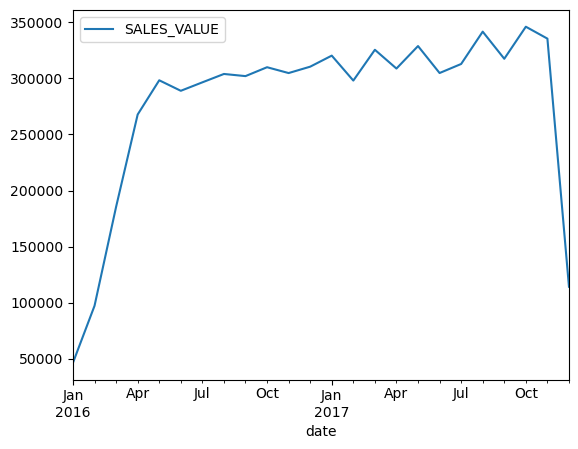

In [14]:
# Set a date index, graby the sales column, and calculate a monthly sun using resampling.
# then build the default line plot

(transactions.set_index("date")
  .loc[:, ["SALES_VALUE"]]
  .resample("ME")
  .sum()
  .plot()
)

<Axes: xlabel='date'>

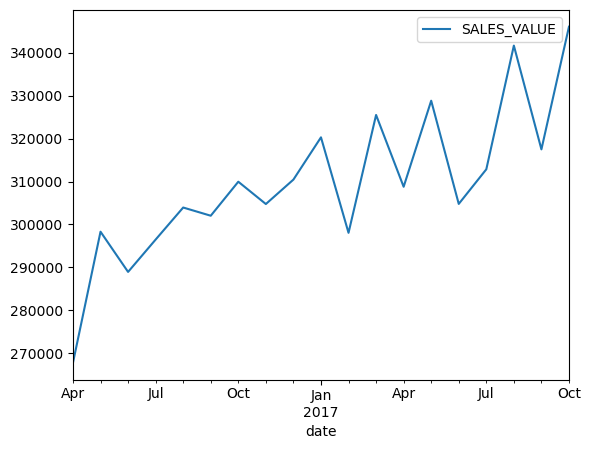

In [16]:
# Filter above plot to specified date range with row slice in .loc

(transactions.set_index("date")
  .sort_index()
  .loc["2016-04":"2017-10", ["SALES_VALUE"]]
  .resample("ME")
  .sum()
  .plot()
)

<Axes: xlabel='date'>

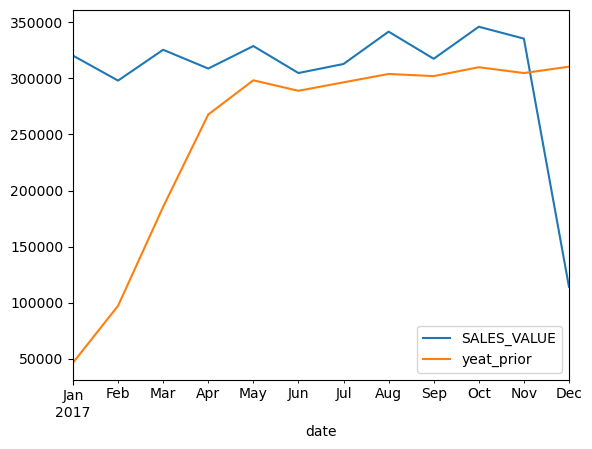

In [28]:
# After resampling monthly sales. create a year_prior column with assign
# This column is our monthly sales shifter forward a year (12 rows/months)

(transactions
    .set_index("date")
    .sort_index()
    .loc[:, ["SALES_VALUE"]]
    .resample("ME")
    .sum()
    .assign(yeat_prior = lambda x : x["SALES_VALUE"].shift(12))
    .loc["2017"]
    .plot()
)

<Axes: xlabel='date'>

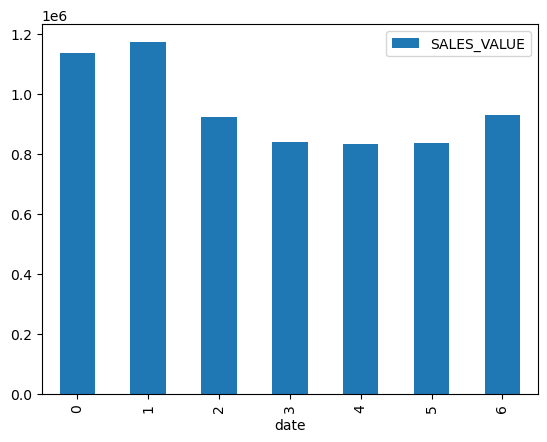

In [48]:
# Group transactions by dayofweek, then calculate sum and plot a bar chart

(transactions
 .groupby(transactions["date"].dt.dayofweek)
 .agg({"SALES_VALUE":"sum"})
 .plot.bar()
)

In [20]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


# DEMOGRAPHICS

In [103]:
dem_cols = ["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"]

dem_dtypes = {"AGE_DESC": "category", "INCOME_DESC": "category", "HH_COMP_DESC": "category"}

path = ("D:/Analyst/Python/NumPy_&_Python/Pandas_Course_Resources/project_data/hh_demographic.csv")

demographics = pd.read_csv(path,
                           usecols = dem_cols,
                           dtype = dem_dtypes)

In [105]:
demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [107]:
demographics.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 10.7 KB


In [125]:
household_sales = (transactions
    .groupby("household_key")
    .agg({"SALES_VALUE": 'sum'})
)
household_sales

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [129]:
household_sales_demo = household_sales.merge(
                    demographics,
                    how ="inner",
                    left_on="household_key",
                    right_on="household_key")

household_sales_demo

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.16,65+,35-49K,2 Adults No Kids
1,7,3400.05,45-54,50-74K,2 Adults No Kids
2,8,5534.97,25-34,25-34K,2 Adults Kids
3,13,13190.92,25-34,75-99K,2 Adults Kids
4,16,1512.02,45-54,50-74K,Single Female
...,...,...,...,...,...
663,2087,7832.74,45-54,100-124K,Unknown
664,2088,4905.71,25-34,35-49K,Single Female
665,2092,2290.54,35-44,Under 15K,1 Adult Kids
666,2094,3055.52,45-54,50-74K,2 Adults No Kids


In [131]:
household_sales_demo.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int64   
 1   SALES_VALUE    668 non-null    float64 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float64(1), int64(1)
memory usage: 14.5 KB


<Axes: xlabel='AGE_DESC'>

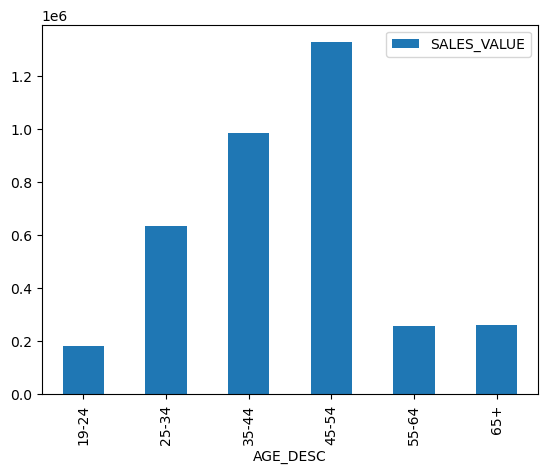

In [161]:
# Calculate sum of sales by age group

(household_sales_demo
    .groupby("AGE_DESC",observed= False)
    .agg({"SALES_VALUE": "sum"})
    .plot.bar()
)

<Axes: xlabel='INCOME_DESC'>

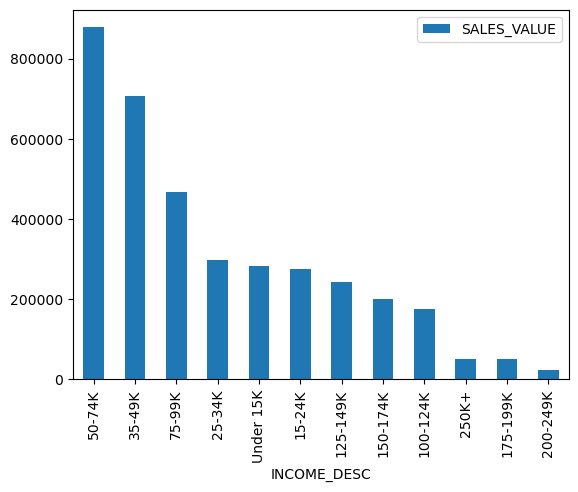

In [167]:
# Calculate sum of sales by income, ordered by magnitude

income_sales = (household_sales_demo
    .groupby("INCOME_DESC", observed= False)
    .agg({"SALES_VALUE": 'sum'})
    .sort_values('SALES_VALUE', ascending = False)
    .plot.bar())

income_sales

In [181]:
# Calculate mean household spend by Age Description and HH composition
# Format with a heatmap across all cells

(household_sales_demo.pivot_table(index ="AGE_DESC",observed= False,
                                  columns = "HH_COMP_DESC",
                                  values = "SALES_VALUE",
                                  aggfunc= "sum")
 .style.format("{:.2f}").background_gradient(cmap="RdYlGn", axis=None)
)

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown
AGE_DESC,,,,,,
19-24,21806.39,43431.56,60312.00,41184.86,6433.67,9822.55
25-34,88195.15,212897.02,135324.38,81726.49,103099.97,14712.54
35-44,56679.64,354663.93,281718.56,174440.57,72662.88,46504.61
45-54,79590.83,323913.74,432125.00,168326.52,111279.29,213135.81
55-64,3064.87,28173.93,109295.86,62609.93,31380.37,23921.25
65+,4040.81,16610.60,129195.04,69014.89,38715.56,2879.29


In [199]:
# delete dfs we don't use anymore

del [household_sales_demo, household_sales]

# PRODUCT DEMOGRAPHICS

In [208]:
product_cols = ["PRODUCT_ID", "DEPARTMENT"]

product_dtypes = {"PRODUCT_ID": "Int32", "DEPARTMENT":"category"}

path = ("D:/Analyst/Python/NumPy_&_Python/Pandas_Course_Resources/project_data/product.csv")

product = pd.read_csv(path,
                     usecols = product_cols,
                     dtype = product_dtypes)

In [222]:
transactions

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01
...,...,...,...,...,...,...
2146306,1598,42305362535,92130,1,0.99,2017-12-11
2146307,1598,42305362535,114102,1,8.89,2017-12-11
2146308,1598,42305362535,133449,1,6.99,2017-12-11
2146309,1598,42305362535,6923644,1,4.50,2017-12-11


In [232]:
demographics

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16
...,...,...,...,...
796,35-44,50-74K,2 Adults No Kids,2494
797,45-54,75-99K,Unknown,2496
798,45-54,35-49K,Single Male,2497
799,25-34,50-74K,2 Adults No Kids,2498


In [236]:
# Here we have joined all three tables together with an inner join

trans_demo_dept =(transactions
                  .merge(demographics,
                        how='inner',
                        left_on = "household_key",
                        right_on = "household_key")
                   .merge(product,
                        how = "inner",
                        left_on= "PRODUCT_ID",
                        right_on = "PRODUCT_ID")
                 )

trans_demo_dept

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-01,65+,100-124K,Single Female,GROCERY
1,1364,26984896261,897044,1,2.99,2016-01-01,65+,100-124K,Single Female,GROCERY
2,1364,26984896261,920955,1,3.09,2016-01-01,65+,100-124K,Single Female,MEAT
3,1364,26984896261,937406,1,2.50,2016-01-01,65+,100-124K,Single Female,MEAT-PCKGD
4,1364,26984896261,981760,1,0.60,2016-01-01,65+,100-124K,Single Female,GROCERY
...,...,...,...,...,...,...,...,...,...,...
1161570,1369,42302712189,844054,1,1.29,2017-12-11,25-34,Under 15K,Single Male,GROCERY
1161571,1369,42302712189,844759,1,1.69,2017-12-11,25-34,Under 15K,Single Male,GROCERY
1161572,1369,42302712189,959737,2,25.98,2017-12-11,25-34,Under 15K,Single Male,GROCERY
1161573,1369,42302712189,1135096,1,1.99,2017-12-11,25-34,Under 15K,Single Male,GROCERY


In [240]:
trans_demo_dept.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161575 entries, 0 to 1161574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   household_key  1161575 non-null  int64         
 1   BASKET_ID      1161575 non-null  int64         
 2   PRODUCT_ID     1161575 non-null  Int32         
 3   QUANTITY       1161575 non-null  Int32         
 4   SALES_VALUE    1161575 non-null  float64       
 5   date           1161575 non-null  datetime64[ns]
 6   AGE_DESC       1161575 non-null  category      
 7   INCOME_DESC    1161575 non-null  category      
 8   HH_COMP_DESC   1161575 non-null  category      
 9   DEPARTMENT     1161575 non-null  category      
dtypes: Int32(2), category(4), datetime64[ns](1), float64(1), int64(2)
memory usage: 51.0 MB


In [260]:
# Where does out youngest demographic rank neat the top in sales?

(trans_demo_dept.pivot_table(index = "DEPARTMENT",
                                 columns = "AGE_DESC",
                                 values = "SALES_VALUE",
                                 aggfunc = 'sum',
                                 observed=False
                           )#.iloc[:10]
.style.format("{:.2f}").background_gradient(cmap="RdYlGn", axis=1))

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.00,0.00,0.00,0.00,0.00,0.00
AUTOMOTIVE,11.64,21.25,72.58,55.92,0.00,16.37
CHARITABLE CONT,0.00,0.00,0.00,0.00,0.00,0.00
CHEF SHOPPE,81.30,134.16,348.53,418.24,80.86,149.24
CNTRL/STORE SUP,2.00,0.00,1.00,9.95,2.00,0.10
COSMETICS,698.63,2273.03,4362.02,5187.57,986.26,600.90
COUP/STR & MFG,7.49,48.42,121.20,154.55,40.68,20.49
DAIRY DELI,3.80,3.85,7.39,16.75,3.14,1.94
DELI,4043.30,18181.94,34577.29,44334.22,9850.54,10462.33


# EXPORT


In [268]:
# Call to_excel on pivot table above - note the formatting gets passed to excel tool

(trans_demo_dept.pivot_table(index = "DEPARTMENT",
                                 columns = "AGE_DESC",
                                 values = "SALES_VALUE",
                                 aggfunc = 'sum',
                                 observed=False
                            )
  .style.background_gradient(cmap="RdYlGn", axis=1)
  .to_excel("demographic_category_sales.xlsx", sheet_name="sales_pivot")
 )

In [272]:
# We are seeing here where my file stored in out OS

import os

file_path = os.path.abspath("demographic_category_sales.xlsx")
print("File saved at:", file_path)

File saved at: C:\Users\mdsad\Python Projects\demographic_category_sales.xlsx


In [274]:
import os

print("Current directory:", os.getcwd())

Current directory: C:\Users\mdsad\Python Projects
